In [1]:
import importlib

import common

importlib.reload(common)

<module 'common' from 'C:\\Users\\j\\IdeaProjects\\fiit_masters_thesis_project\\jupyter\\common.py'>

In [2]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy
from common import create_engine, display_all, figsize

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() # converters e.g. for datetime in plots

In [3]:
engine = create_engine('db-conf.json', 'local')
pd.sql = lambda sql: pd.read_sql(sqlalchemy.text(sql), con=engine)

Nacitanie dat z db (live data z monant snapshotu)

In [4]:
fetch_data_query = '''
WITH fb_popularity AS (SELECT sbq.url, sbq.sync_date, sbq.reaction_count, sbq.comment_count, sbq.share_count
                       FROM (
                                SELECT afe.*, row_number() OVER (PARTITION BY url ORDER BY sync_date) as rn
                                FROM article_fb_engagement afe) sbq
                       WHERE sbq.rn = 1
)
SELECT a.id,
       a.url,
       title,
       perex,
       body,
       published_at,
       extracted_at,
       a.source_id,
       category,
       other_info,
       aut.name                                       as author_name,
       s.id                                           as source_id,
       s.name                                         as source_name,
       stype                                          as source_type,
       is_reliable::integer                           as source_is_reliable,
       sync_date                                      as fb_sync_date,
       reaction_count                                 as fb_reaction_count,
       comment_count                                  as fb_comment_count,
       share_count                                    as fb_share_count,
       (reaction_count + comment_count + share_count) as fb_popularity
FROM article a
         JOIN source s on a.source_id = s.id
         JOIN (SELECT * FROM fb_popularity) p ON a.url = p.url
         JOIN author aut on a.author_id = aut.id
WHERE s.url !~ '(\.sk$)|(\.cz$)' -- remove cz/sk sources
  AND s.url NOT IN ('https://www.badatel.net', -- cz/sk portals not using cz/sk domain
                    'https://www.energiezivota.com',
                    'https://vedomec.com')
  AND a.published_at IS NOT NULL
  AND s.is_reliable IS NOT NULL;
'''

df = pd.sql(fetch_data_query)
df_copy = df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157459 entries, 0 to 157458
Data columns (total 20 columns):
id                    157459 non-null int64
url                   157459 non-null object
title                 157459 non-null object
perex                 137125 non-null object
body                  157259 non-null object
published_at          157459 non-null datetime64[ns]
extracted_at          157459 non-null datetime64[ns]
source_id             157459 non-null int64
category              136000 non-null object
other_info            157459 non-null object
author_name           157459 non-null object
source_id             157459 non-null int64
source_name           157459 non-null object
source_type           157459 non-null object
source_is_reliable    157459 non-null int64
fb_sync_date          157459 non-null datetime64[ns]
fb_reaction_count     157459 non-null int64
fb_comment_count      157459 non-null int64
fb_share_count        157459 non-null int64
fb_popularity    

In [6]:
df.head()

,id,url,title,perex,body,published_at,extracted_at,source_id,category,other_info,author_name,source_id,source_name,source_type,source_is_reliable,fb_sync_date,fb_reaction_count,fb_comment_count,fb_share_count,fb_popularity
0,355149,http://blog.healthadvocate.com/2009/12/discove...,Discover Health Advocacy: Coverage for hospita...,"<p>We built our company, Health Advocate, Inc....","We built our company, Health Advocate, Inc., t...",2009-12-29 16:22:36,2019-09-06 04:02:09.831386,223,Advocacy in Action,"{'tags': ['Advocacy', 'Health Advocate', 'Heal...",admin,223,healthadvocate.com,news_website,1,2019-10-14 21:53:23.370152,0,0,0,0
1,355150,http://blog.healthadvocate.com/2010/01/discove...,Discover Health Advocacy: Comparing medical costs,"<p>We built our company, Health Advocate, Inc....","We built our company, Health Advocate, Inc., t...",2010-01-18 16:54:05,2019-09-06 04:02:10.047665,223,Advocacy in Action,"{'tags': ['Benefits', 'Health Advocacy', 'Heal...",admin,223,healthadvocate.com,news_website,1,2019-10-14 21:53:23.370164,0,0,0,0
2,355151,http://blog.healthadvocate.com/2010/01/discove...,Discover Health Advocacy: Underinsured patient...,"<p>We built our company, Health Advocate, Inc....","We built our company, Health Advocate, Inc., t...",2010-01-29 16:56:15,2019-09-06 04:02:10.226448,223,Advocacy in Action,"{'tags': ['Health Advocacy', 'Health Advocate'...",admin,223,healthadvocate.com,news_website,1,2019-10-14 21:53:23.370171,0,0,0,0
3,355152,http://blog.healthadvocate.com/2010/02/discove...,Discover Health Advocacy: Coverage denied for ...,"<p>We built our company, Health Advocate, Inc....","We built our company, Health Advocate, Inc., t...",2010-02-04 16:59:52,2019-09-06 04:02:10.402828,223,Advocacy in Action,"{'tags': ['Health Advocacy', 'Health Advocate'...",admin,223,healthadvocate.com,news_website,1,2019-10-14 21:53:23.370178,0,0,0,0
4,355153,http://blog.healthadvocate.com/2010/02/discove...,Discover Health Advocacy: Unreasonable balance...,"<p>We built our company, Health Advocate, Inc....","We built our company, Health Advocate, Inc., t...",2010-02-10 10:39:36,2019-09-06 04:02:10.593390,223,Advocacy in Action,"{'tags': ['Health Advocacy', 'Health Advocate'...",admin,223,healthadvocate.com,news_website,1,2019-10-14 21:53:23.370185,0,0,0,0


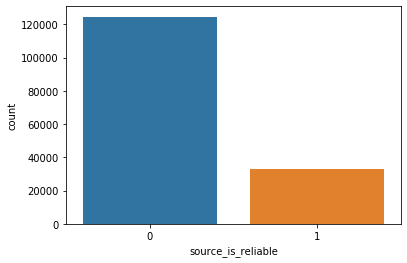

In [7]:
sns.countplot(x='source_is_reliable', data=df)

In [8]:
df['fb_popularity'].describe().apply(lambda x: '%.3f' % x)

count     157459.000
mean        1088.211
std        24326.943
min            0.000
25%            0.000
50%            1.000
75%           75.000
max      5197586.000
Name: fb_popularity, dtype: object

In [9]:
def draw_publishing_per_year(df):
    published_in_year = df.published_at.apply(lambda x: x.year)
    with figsize(plt, 20, 5):
        sns.countplot(published_in_year)

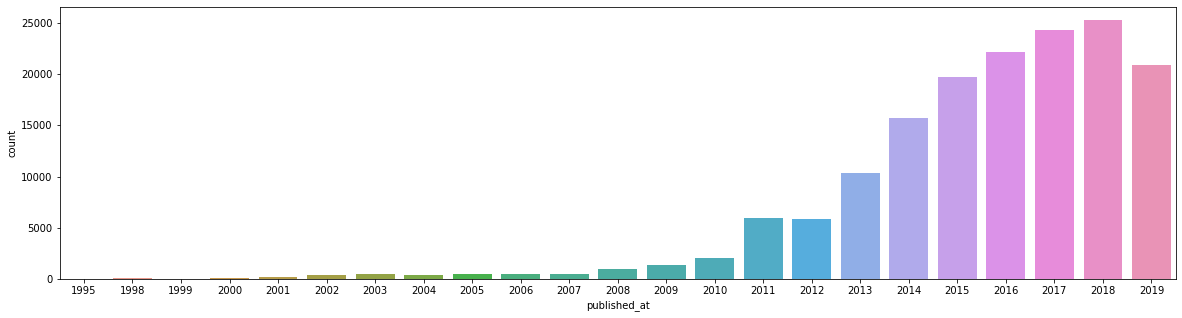

In [10]:
draw_publishing_per_year(df)

Cut the articls so we use only those from 2011 - now

In [11]:
df = df[df.published_at > '2011-01-01']

In [12]:
df['source_is_reliable'] = df['source_is_reliable'] * 1 # change true/false to 1/0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150165 entries, 12 to 157458
Data columns (total 20 columns):
id                    150165 non-null int64
url                   150165 non-null object
title                 150165 non-null object
perex                 129831 non-null object
body                  149969 non-null object
published_at          150165 non-null datetime64[ns]
extracted_at          150165 non-null datetime64[ns]
source_id             150165 non-null int64
category              128710 non-null object
other_info            150165 non-null object
author_name           150165 non-null object
source_id             150165 non-null int64
source_name           150165 non-null object
source_type           150165 non-null object
source_is_reliable    150165 non-null int64
fb_sync_date          150165 non-null datetime64[ns]
fb_reaction_count     150165 non-null int64
fb_comment_count      150165 non-null int64
fb_share_count        150165 non-null int64
fb_popularity   

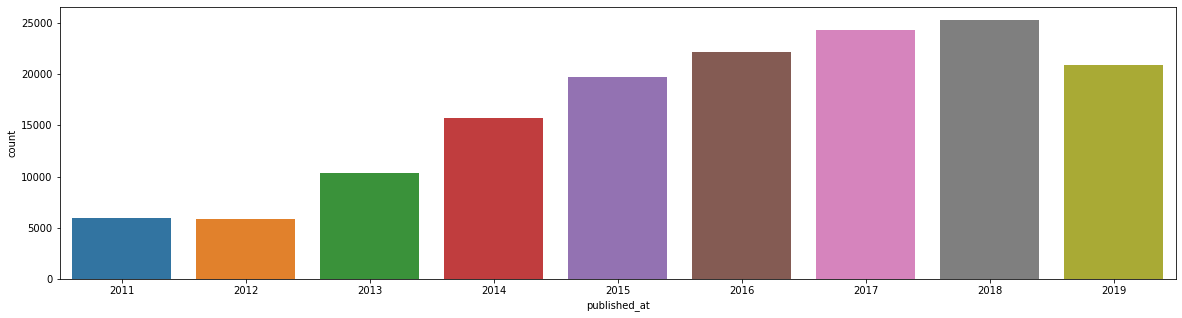

In [14]:
draw_publishing_per_year(df)

In [15]:
display_all(df[['source_is_reliable', 'fb_reaction_count', 'fb_comment_count', 'fb_share_count']] .groupby('source_is_reliable').describe())

fb_reaction_count                                           \
                               count        mean           std  min  25%  50%   
source_is_reliable                                                              
0                           118511.0  871.263275  20291.823451  0.0  0.0  0.0   
1                            31654.0  208.594901   2839.977696  0.0  0.0  0.0   

                                    fb_comment_count                           \
                     75%        max            count        mean          std   
source_is_reliable                                                              
0                   48.0  3929532.0         118511.0  197.759499  4415.166469   
1                   25.0   297646.0          31654.0   51.824351   554.945015   

                                                 fb_share_count              \
                    min  25%  50%  75%       max          count        mean   
source_is_reliable                                                            
0                   0.0  0.0  0.0  6.0  714968.0       118511.0  283.465670   
1                   0.0  0.0  0.0  3.0   41610.0        31654.0   73.806122   

                                                                
                            std  min  25%  50%   75%       max  
source_is_reliable                                              
0                   4435.047964  0.0  0.0  1.0  33.0  572708.0  
1                    789.540472  0.0  0.0  0.0  16.0   59635.0